Group_4_data - Page Block Classification

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymysql.cursors

# Importing the required modules 

In [49]:
set_column_names = ['height', 'length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'blackpix', 'blackand', 'wb_trans', 'y']

# set column names

# Height indicates the height of the block
# Length indicates the length of the block
# Area indicates the length*height
# Eccen indicates the Eccentricity which means (length/height)
# p_black indiactes the percentage of black pixels within a block (blackpix/area)
# p_and indicates the percentage of black pixels after the application of RUN LENGTH SMOOTH ALGORITHM (blackend/area)
# mean_tr indicates the number of white-black transitions (blackpix/wb_trans)
# blackpix indicates the total number of black pixels in original bitmap of the block
# blackand indicate the total number of black pixels in original bitmap of the block after RLSA
# wb_trans indicates the number of white-black transitions in the original bitmap of the block
# y output of the data


In [50]:
page_block = pd.read_csv("Group_4_data.csv", sep="\s+", names = set_column_names)

# Add column names to the page-blocks.data file, read using pandas module
# sep = '\s+' is a regex where \s indicates the space(' ') and '+' indicates the one or more occurances

In [51]:
page_block.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,y
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [52]:
page_block.info()

#information about the data frame page_block

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    5473 non-null   int64  
 1   length    5473 non-null   int64  
 2   area      5473 non-null   int64  
 3   eccen     5473 non-null   float64
 4   p_black   5473 non-null   float64
 5   p_and     5473 non-null   float64
 6   mean_tr   5473 non-null   float64
 7   blackpix  5473 non-null   int64  
 8   blackand  5473 non-null   int64  
 9   wb_trans  5473 non-null   int64  
 10  y         5473 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 470.5 KB


In [53]:
page_block.shape

#shape of the page_block data frame

(5473, 11)

In [54]:
Find_missing_values = page_block.isnull().any()
Find_missing_values

# True indicates the missing value and the False indicates that there are no missing values

height      False
length      False
area        False
eccen       False
p_black     False
p_and       False
mean_tr     False
blackpix    False
blackand    False
wb_trans    False
y           False
dtype: bool

In [55]:
page_block.describe()

# describe method shows the stastical data of columns

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,y
count,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000,5473.000000
mean,10.473232,89.568244,1198.405628,13.753977,0.368642,0.785053,6.219278,365.930751,741.108167,106.662891,1.202631
std,18.960564,114.721758,4849.376950,30.703737,0.177757,0.170661,69.079021,1270.333082,1881.504302,167.308362,0.721470
min,1.000000,1.000000,7.000000,0.007000,0.052000,0.062000,1.000000,7.000000,7.000000,1.000000,1.000000
25%,7.000000,17.000000,114.000000,2.143000,0.261000,0.679000,1.610000,42.000000,95.000000,17.000000,1.000000
50%,8.000000,41.000000,322.000000,5.167000,0.337000,0.803000,2.070000,108.000000,250.000000,49.000000,1.000000
75%,10.000000,107.000000,980.000000,13.625000,0.426000,0.927000,3.000000,284.000000,718.000000,126.000000,1.000000
max,804.000000,553.000000,143993.000000,537.000000,1.000000,1.000000,4955.000000,33017.000000,46133.000000,3212.000000,5.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb87990a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb8799640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdff0035eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb8799be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb8799eb0>],
 'means': []}

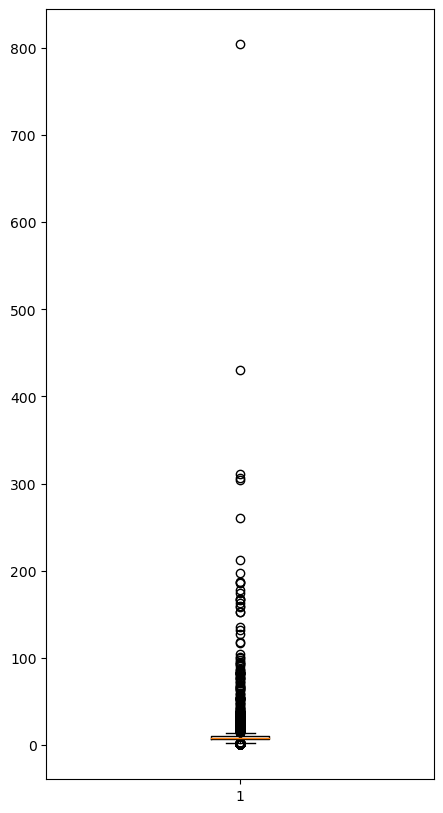

In [56]:
plt.figure(figsize=(5,10))
plt.boxplot(page_block['height'])

# Boxplot to detect the outliers

In [57]:
Q1 = page_block.quantile(0.25)
Q2 = page_block.quantile(0.50)
Q3 = page_block.quantile(0.75)
IQR = Q3 - Q1
IQR = IQR[:-1]

# INTER QUARTILE RANGE to find difference of Q3 and Q1

In [58]:
page_block.mask(page_block>(Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, inplace=True, axis=1)
page_block.mask(page_block<(Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, inplace=True, axis=1)

# Removing the outliers

/var/folders/_0/0cht2qj15fg9txp4gk82m9j80000gn/T/ipykernel_18317/3334011062.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  page_block.mask(page_block>(Q3 + 1.5 * IQR), Q3 + 1.5 * IQR, inplace=True, axis=1)
/var/folders/_0/0cht2qj15fg9txp4gk82m9j80000gn/T/ipykernel_18317/3334011062.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  page_block.mask(page_block<(Q1 - 1.5 * IQR), Q1 - 1.5 * IQR, inplace=True, axis=1)


In [59]:
page_block

# page_block dataframe after removing outliers

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,y
0,5.0,7,35,1.400,0.4000,0.657,2.330,14,23.0,6.0,1
1,6.0,7,42,1.167,0.4290,0.881,3.600,18,37.0,5.0,1
2,6.0,18,108,3.000,0.2870,0.741,4.430,31,80.0,7.0,1
3,5.0,7,35,1.400,0.3710,0.743,4.330,13,26.0,3.0,1
4,6.0,3,18,0.500,0.5000,0.944,2.250,9,17.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5468,4.0,242,2096,30.848,0.5420,0.603,5.085,647,1264.0,28.0,2
5469,7.0,4,28,0.571,0.6735,0.929,5.085,20,26.0,2.0,1
5470,6.0,95,570,15.833,0.3000,0.911,1.640,171,519.0,104.0,1
5471,7.0,41,287,5.857,0.2130,0.801,1.360,61,230.0,45.0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdfb86ca4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdfb86caa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdfb86ca1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdfb86c0040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdfb86c0310>],
 'means': []}

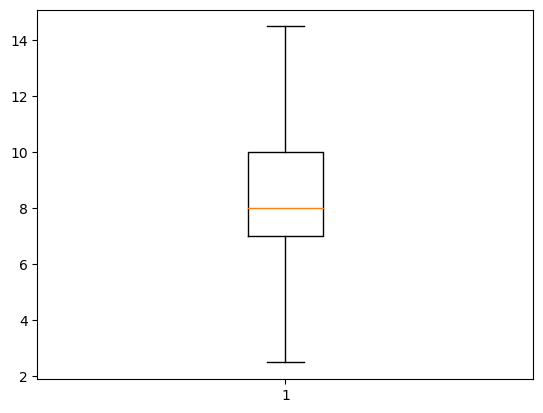

In [60]:
plt.boxplot(page_block['height'])

# Boxplot after removing outliers

In [61]:
page_block.corr()

# corr method to find the correlation between variables

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,y
height,1.000000,0.288692,0.546457,-0.150667,-0.158559,-0.290633,0.183018,0.539793,0.540005,0.489250,0.091803
length,0.288692,1.000000,0.912809,0.822019,-0.278593,-0.372101,0.028203,0.872641,0.902231,0.882271,-0.039975
area,0.546457,0.912809,1.000000,0.617646,-0.315229,-0.426594,0.053713,0.935165,0.975716,0.932976,0.008882
eccen,-0.150667,0.822019,0.617646,1.000000,-0.168061,-0.209669,-0.010290,0.578282,0.608727,0.611813,-0.037068
p_black,-0.158559,-0.278593,-0.315229,-0.168061,1.000000,0.542355,0.654105,-0.114020,-0.256490,-0.331156,0.115825
p_and,-0.290633,-0.372101,-0.426594,-0.209669,0.542355,1.000000,-0.028973,-0.299010,-0.305612,-0.301854,-0.157967
mean_tr,0.183018,0.028203,0.053713,-0.010290,0.654105,-0.028973,1.000000,0.181950,0.040050,-0.113014,0.367894
blackpix,0.539793,0.872641,0.935165,0.578282,-0.114020,-0.299010,0.181950,1.000000,0.954658,0.885173,-0.012029
blackand,0.540005,0.902231,0.975716,0.608727,-0.256490,-0.305612,0.040050,0.954658,1.000000,0.956369,-0.047140
wb_trans,0.489250,0.882271,0.932976,0.611813,-0.331156,-0.301854,-0.113014,0.885173,0.956369,1.000000,-0.111120


<AxesSubplot:>

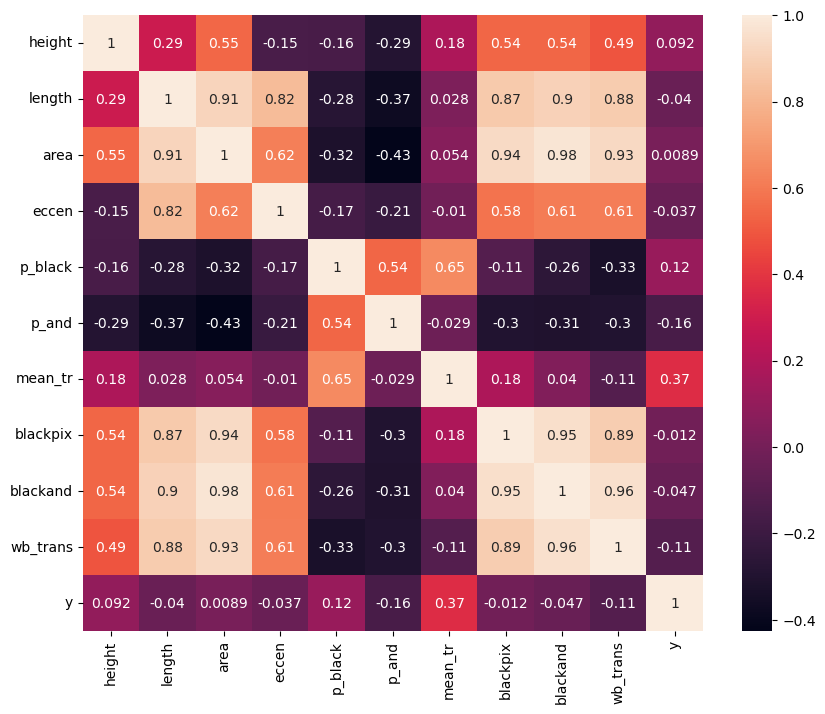

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(page_block.corr(), annot=True)

# Heatmap plot which shows correlation between attributes

In [63]:
page_block.to_csv("./Group_4_data_cleaned.csv")

# Cleaned Group_4_data file

In [64]:
np.savez("./Group_4_data_cleaned.npz", page_block)

# saving as npz file 

In [65]:
page_block.to_pickle('./Group_4_data_cleaned.pkl')

# converting to pickle file

In [66]:
connection=pymysql.connect(host="127.0.0.1",user='root',password='Chandra@1333')

# Make connection to database by providing host, user, password

In [67]:
connection.select_db('page_blocks')

# Selecting Database page_blocks

In [68]:
curs = connection.cursor(pymysql.cursors.DictCursor)

# connection.cursor method to call a query

In [69]:
sql_query = "SELECT * FROM group_4_data limit 5"
curs.execute(sql_query)

# Execute a sample query to print first 5 values

5

In [70]:
df=pd.DataFrame(curs.fetchall())
display(df)

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,y
0,5.0,7,35,1.400,0.400,0.657,2.33,14,23.0,6.0,1
1,6.0,7,42,1.167,0.429,0.881,3.60,18,37.0,5.0,1
2,6.0,18,108,3.000,0.287,0.741,4.43,31,80.0,7.0,1
3,5.0,7,35,1.400,0.371,0.743,4.33,13,26.0,3.0,1
4,6.0,3,18,0.500,0.500,0.944,2.25,9,17.0,4.0,1
